In [1]:
import os
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from classical_solvers.solver_benchmark import SolverBenchmark

In [2]:
def run_benchmark(solver):
    benchmark_results = []
    with tqdm(total=len(solver.nx_list), desc=f"Running {solver.name} Benchmark") as pbar:

        if solver.traversal_method == 'nested':
            for nx in solver.nx_list:
                for ny in solver.ny_list:
                    pbar.set_description(f"Solver: {solver.name}, Size: nx={nx}, ny={ny}")
                    solver.run(nx, ny)
                    pbar.update(1)
        elif solver.traversal_method == 'zip':
            for nx, ny in zip(solver.nx_list, solver.ny_list):
                pbar.set_description(f"Solver: {solver.name}, Size: nx={nx}, ny={ny}")
                solver.run(nx, ny)
                pbar.update(1)
    return benchmark_results

Solver: brute_force, Size: nx=2, ny=2:   0%|          | 0/1 [00:00<?, ?it/s]

Solver: simulated_annealing, Size: nx=5, ny=5: 100%|██████████| 5/5 [00:07<00:00,  1.42s/it]


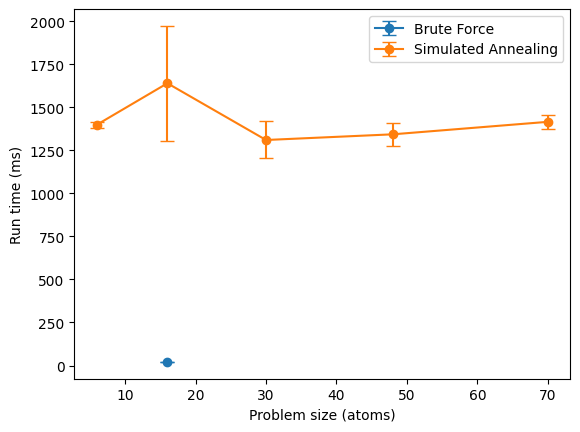

In [3]:
brute_force_config = {
    "name": "brute_force",
    "executable": "./brute_force/brute_force",
    # "nx_list": [1, 2, 3, 4, 5],
    # "ny_list": [1, 1, 1, 1, 1],
    "nx_list": [2],
    "ny_list": [2],
    "crystals_directory": '../native_crystal_database/benchmark_crystals/brute_force/',
    "solutions_directory": './brute_force/solutions',
    "benchmark_file_path": './brute_force_benchmark_results.csv', 
    "traversal_method": 'zip'
}

simulated_annealing_config = {
    "name": "simulated_annealing",
    "executable": "./simulated_annealing/simulated_annealing",
    "nx_list": [1, 2, 3, 4, 5],
    "ny_list": [1, 2, 3, 4, 5],
    "crystals_directory": '../native_crystal_database/benchmark_crystals/simulated_annealing/',
    "solutions_directory": './simulated_annealing/solutions',
    "benchmark_file_path": './simulated_annealing_benchmark_results.csv', 
    "repetitions": 100,
    "iterations": 1e4, 
    "traversal_method": 'zip'
}

brute_force_solver = SolverBenchmark(**brute_force_config)
simulated_annealing_solver = SolverBenchmark(**simulated_annealing_config)

brute_force_solver.generate_problems()
simulated_annealing_solver.generate_problems()

for solver in [brute_force_solver, simulated_annealing_solver]:
    run_benchmark(solver)

df_brute_force = pd.read_csv(brute_force_config['benchmark_file_path'])
stats_df_brute_force = df_brute_force.groupby(['solver', 'problem_size'])['runtime'].agg(['mean', 'std']).reset_index()

df_simulated_annealing = pd.read_csv(simulated_annealing_config['benchmark_file_path'])
stats_df_simulated_annealing = df_simulated_annealing.groupby(['solver', 'problem_size'])['runtime'].agg(['mean', 'std']).reset_index()

fig, ax = plt.subplots()
ax.errorbar(stats_df_brute_force['problem_size'], stats_df_brute_force['mean'], yerr=stats_df_brute_force['std'], label='Brute Force', fmt='-o', capsize=5)
ax.errorbar(stats_df_simulated_annealing['problem_size'], stats_df_simulated_annealing['mean'], yerr=stats_df_simulated_annealing['std'], label='Simulated Annealing', fmt='-o', capsize=5)

ax.set_xlabel('Problem size (atoms)')
ax.set_ylabel('Run time (ms)')
ax.legend()
plt.show()